In [ ]:
# QQ Plot
# Shapiro-Wilks Test : 소표본(n < 50)에 강력한 정규성 검정 방법
# Kolmogorov-Smirnov Test : 이론적 분포(예: 정규분포)와의 최대 차이를 이용
# Jarque-Bera 검정 : 왜도(skewness)와 첨도(kurtosis)를 기준으로 검정 (주로 회귀분석 잔차에서 사용)
# Lilliefors : K-S 검정의 변형, 정규분포의 모수를 데이터로 추정할 때 사용
# Cramer-von Mises
# Anderson-Darling : K-S보다 꼬리 부분에 민감

# 정규성 검사는 "정규분포(Normal Distribution)"를 따르는지 확인하는 검사 (표준 정규분포를 의미하지 않음)
# 귀무가설 : 데이터는 정규분포를 따른다.
# 대립가설 : 데이터는 정규분포를 따르지 않는다.

In [ ]:
- 샤피로 윌크 검정(Shapiro-Wilk Test)은 통계량을 계산하여 정규성을 검정하는 기법, 데이터의 수가 많지 않을 때 사용
- Q-Q Plot은 정규성 검정을 위해 일반적으로 사용되는 시각화 기법이지만 데이터의 크기에 따라 해석이 어려워질 수 있다.
- 데이터의 왜도가 0을 기준으로 작거나 큰 경우 Q-Q Plot을 그리면 데이터가 기준선을 벗어나는 양상을 보인다.
- 정규성 검정은 표본 집단의 가정된 분포가 주어진 경우에 주로 수행하는 기법이 아니다.
ㄴ 표본 집단의 가정된 분포가 정해지지 않은 경우 수행하는 기법

In [6]:
from scipy.stats import shapiro

data = [4.1, 4.3, 4.2, 4.4, 4.3, 4.2, 4.5, 4.3]
stat, p = shapiro(data)

alpha = 0.05
if p > alpha:
    print("귀무가설 채택 → 정규분포를 따른다")
else:
    print("귀무가설 기각 → 정규분포를 따르지 않는다")

귀무가설 채택 → 정규분포를 따른다


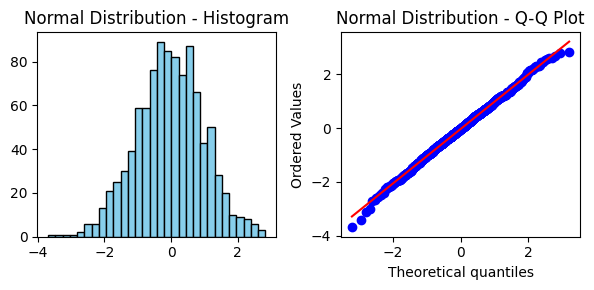

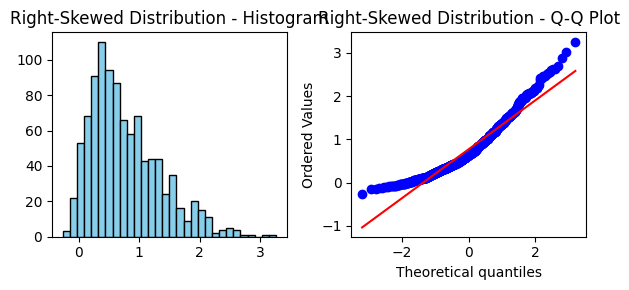

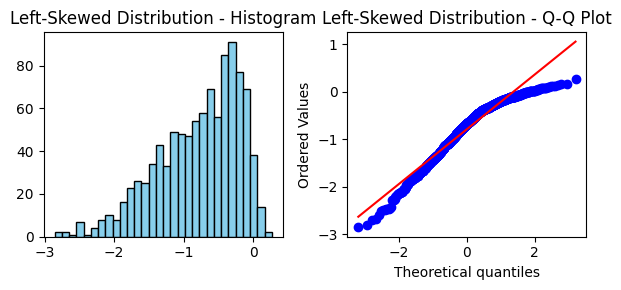

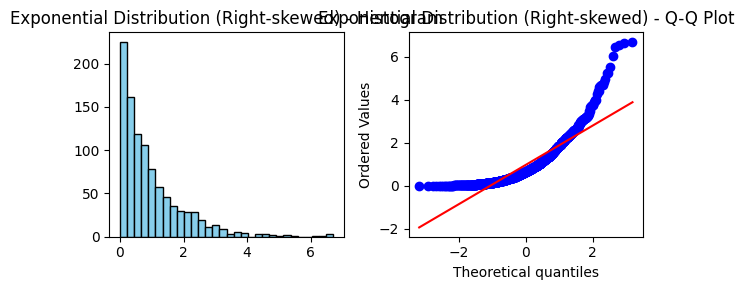

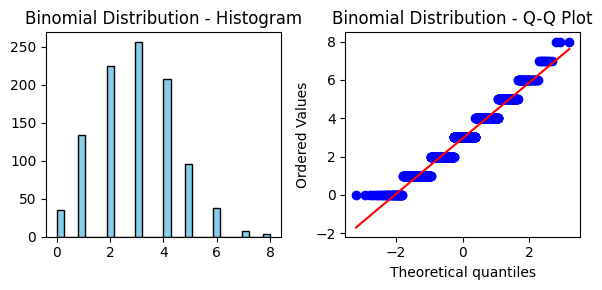

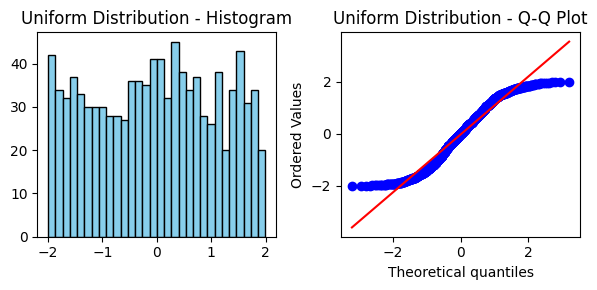

In [3]:
# Q-Q Plot
# Right-Skewed 
# = 데이터 분포가 왼쪽에 치우쳐져 있다.
# = 데이터의 평균보다 중앙값이 크다.
# = 오른쪽으로 긴 꼬리가 늘어진 형태에 해당.
# = 왜도가 0보다 크다

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_data_and_qq(data, title_prefix):
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    # 히스토그램
    axes[0].hist(data, bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f"{title_prefix} - Histogram")
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title(f"{title_prefix} - Q-Q Plot")
    
    plt.tight_layout()
    plt.show()

# 1. 정규분포
normal_data = np.random.normal(loc=0, scale=1, size=1000)
plot_data_and_qq(normal_data, "Normal Distribution")

# 2. 오른쪽 치우친 분포 (Right-skewed)
right_skewed = stats.skewnorm.rvs(a=10, loc=0, scale=1, size=1000)  # a > 0
plot_data_and_qq(right_skewed, "Right-Skewed Distribution")

# 3. 왼쪽 치우친 분포 (Left-skewed)
left_skewed = stats.skewnorm.rvs(a=-10, loc=0, scale=1, size=1000)  # a < 0
plot_data_and_qq(left_skewed, "Left-Skewed Distribution")

# 4. 지수분포 (오른쪽 치우침)
exponential_data = np.random.exponential(scale=1, size=1000)
plot_data_and_qq(exponential_data, "Exponential Distribution (Right-skewed)")

# 5. 이항분포
binomial_data = np.random.binomial(n=10, p=0.3, size=1000)
plot_data_and_qq(binomial_data, "Binomial Distribution")

# 6. 균등분포
uniform_data = np.random.uniform(low=-2, high=2, size=1000)
plot_data_and_qq(uniform_data, "Uniform Distribution")